## `BLOCO 1: Importações Centralizadas e Configurações`

In [33]:
# ==============================================================================
# 1. IMPORTAÇÕES
# ==============================================================================
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import joblib

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    f1_score, roc_auc_score, brier_score_loss, precision_recall_curve,
    classification_report, confusion_matrix, roc_curve, auc, accuracy_score, recall_score
)

In [5]:
# ==============================================================================
# 2. CONFIGURAÇÕES GLOBAIS
# ==============================================================================
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

#

## `BLOCO 2: Carregamento e Overview dos dados`

In [6]:
# ==============================================================================
# 1. CARREGANDO OS DADOS
# ==============================================================================
df = pd.read_csv('https://raw.githubusercontent.com/rafaelreisramos/oracle-one-g8-hackathon/refs/heads/main/data/dados_streamingV4.csv')

In [7]:
# ==============================================================================
# 2. PRIMEIRAS 5 LINHAS
# ==============================================================================
df.head()

,cliente_id,idade,genero,regiao,tipo_contrato,metodo_pagamento,plano_assinatura,valor_mensal,tempo_assinatura_meses,dias_ultimo_acesso,acessibilidade,contatos_suporte,visualizacoes_mes,tempo_medio_sessao_min,dispositivo_principal,categoria_favorita,avaliacao_conteudo_media,avaliacao_conteudo_ultimo_mes,avaliacao_plataforma,churn
0,CLI_000001,44,Feminino,Sudeste,Mensal,Pix,Padrão,38.0,42,27,0,2,15,169,Mobile,Séries,"5,0","3,0","2,0",0
1,CLI_000002,36,Feminino,Sudeste,Mensal,Crédito Recorrente,Premium,49.9,20,23,0,1,15,97,Mobile,Filmes,"2,0",NaN,"3,0",0
2,CLI_000003,46,Feminino,Sudeste,Mensal,Cartão de Crédito,Básico,24.9,6,14,0,2,56,118,Desktop,Séries,"1,5",NaN,NaN,0
3,CLI_000004,57,Masculino,Nordeste,Mensal,Crédito Recorrente,Básico,24.9,10,70,0,0,0,31,TV,Séries,"4,0",NaN,NaN,1
4,CLI_000005,34,Outros,Nordeste,Mensal,Crédito Recorrente,Premium,49.9,22,31,0,1,0,46,mobile,Esportes,"4,0",NaN,"1,5",0


In [8]:
# ==============================================================================
# 3. RESUMO ESTATISTICO DAS VARIAVEIS NUMÉRICAS
# ==============================================================================
df.describe()

,idade,valor_mensal,tempo_assinatura_meses,dias_ultimo_acesso,acessibilidade,contatos_suporte,visualizacoes_mes,tempo_medio_sessao_min,churn
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000,30000.000000,30000.000000,30000.000000
mean,37.870033,32.248543,13.058233,24.850167,0.051567,1.1996,27.978700,73.533933,0.249067
std,12.240975,7.818732,12.388886,17.957359,0.221154,1.0973,31.946358,44.548880,0.432480
min,18.000000,22.000000,0.000000,0.000000,0.000000,0.0000,0.000000,5.000000,0.000000
25%,29.000000,24.900000,3.000000,12.000000,0.000000,0.0000,0.000000,35.000000,0.000000
50%,38.000000,32.000000,9.000000,22.000000,0.000000,1.0000,13.000000,73.000000,0.000000
75%,46.000000,38.000000,19.000000,34.000000,0.000000,2.0000,54.000000,106.000000,0.000000
max,85.000000,49.900000,48.000000,112.000000,1.000000,7.0000,159.000000,249.000000,1.000000


In [9]:
# ==============================================================================
# 4. VALORES AUSENTES
# ==============================================================================
df.isnull().sum().sort_values(ascending=False)

avaliacao_conteudo_ultimo_mes    17597
avaliacao_conteudo_media         11777
avaliacao_plataforma              6041
genero                            3000
cliente_id                           0
contatos_suporte                     0
categoria_favorita                   0
dispositivo_principal                0
tempo_medio_sessao_min               0
visualizacoes_mes                    0
acessibilidade                       0
idade                                0
dias_ultimo_acesso                   0
tempo_assinatura_meses               0
valor_mensal                         0
plano_assinatura                     0
metodo_pagamento                     0
tipo_contrato                        0
regiao                               0
churn                                0
dtype: int64

In [10]:
# ==============================================================================
# 5. PROPORÇÃO DE VALORES AUSENTES
# ==============================================================================
percentual_ausentes: pd.Series = (df.isnull().sum() / len(df) * 100).round(2)
percentual_ausentes.sort_values(ascending=False)

avaliacao_conteudo_ultimo_mes    58.66
avaliacao_conteudo_media         39.26
avaliacao_plataforma             20.14
genero                           10.00
cliente_id                        0.00
contatos_suporte                  0.00
categoria_favorita                0.00
dispositivo_principal             0.00
tempo_medio_sessao_min            0.00
visualizacoes_mes                 0.00
acessibilidade                    0.00
idade                             0.00
dias_ultimo_acesso                0.00
tempo_assinatura_meses            0.00
valor_mensal                      0.00
plano_assinatura                  0.00
metodo_pagamento                  0.00
tipo_contrato                     0.00
regiao                            0.00
churn                             0.00
dtype: float64

#

## `BLOCO 3: Centralização de Funções`

In [11]:
# ==============================================================================
# 1. FUNÇÕES AUXILIARES E ENGENHARIA DE FEATURES
# ==============================================================================

def clean_evaluation_column(series):
    """Converte colunas de avaliação (string com vírgula) para float."""
    if series.dtype == 'object':
        return pd.to_numeric(series.astype(str).str.replace(',', '.', regex=False), errors='coerce')
    return series

def get_reference_stats(df):
    """Calcula estatísticas de referência do TREINO para evitar Data Leakage."""
    stats = {
        'max_views': df['visualizacoes_mes'].max() if 'visualizacoes_mes' in df else 1,
        'max_session': df['tempo_medio_sessao_min'].max() if 'tempo_medio_sessao_min' in df else 1,
        'max_dias': df['dias_ultimo_acesso'].max() if 'dias_ultimo_acesso' in df else 1,
        'max_tempo': df['tempo_assinatura_meses'].max() if 'tempo_assinatura_meses' in df else 1
    }
    return stats

def engineer_features(df, ref_stats=None):
    """
    Aplica a engenharia de features.
    Se ref_stats for fornecido (modo teste/validação), usa os máximos do treino.
    Se None (modo treino), calcula os máximos do próprio df.
    """
    df_new = df.copy()
    
    # Se não houver stats de referência, calcula (apenas para o set de treino)
    if ref_stats is None:
        ref_stats = get_reference_stats(df_new)
        
    # Feature 1: Visualizações por dia
    if 'visualizacoes_mes' in df_new.columns:
        df_new['visualizacoes_por_dia'] = df_new['visualizacoes_mes'] / 30.0

    # Feature 2: Score de Engajamento (0-1)
    if 'visualizacoes_mes' in df_new.columns and 'tempo_medio_sessao_min' in df_new.columns:
        df_new['engajamento_score'] = (
            (df_new['visualizacoes_mes'] / ref_stats['max_views']) * 0.6 +
            (df_new['tempo_medio_sessao_min'] / ref_stats['max_session']) * 0.4
        )

    # Feature 3: Score de Risco (0-1)
    if 'dias_ultimo_acesso' in df_new.columns and 'tempo_assinatura_meses' in df_new.columns:
        df_new['risco_score'] = (
            (df_new['dias_ultimo_acesso'] / ref_stats['max_dias']) * 0.7 -
            (df_new['tempo_assinatura_meses'] / ref_stats['max_tempo']) * 0.3
        ).clip(0, 1)

    # Feature 4: Flag de Inatividade Crítica (Threshold empírico: 34 dias)
    if 'dias_ultimo_acesso' in df_new.columns:
        df_new['inativo_flag'] = (df_new['dias_ultimo_acesso'] > 34).astype(int)

    return df_new, ref_stats

def plot_confusion_matrix(y_true, y_pred, title, ax=None):
    """Plota matriz de confusão padronizada."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Retém', 'Churn'], yticklabels=['Retém', 'Churn'])
    ax.set_title(title)
    ax.set_ylabel('Real')
    ax.set_xlabel('Previsto')

def plot_roc_comparison(results_dict):
    """Plota curvas ROC sobrepostas para múltiplos datasets."""
    plt.figure(figsize=(10, 6))
    for name, data in results_dict.items():
        fpr, tpr, _ = roc_curve(data['y_true'], data['y_proba'])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_score:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Comparativo Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.show()

#

## `BLOCO 4: Tratamento Inicial e Limpeza (Data Cleaning)`

In [12]:
# ==============================================================================
# 3. PRÉ-PROCESSAMENTO E LIMPEZA
# ==============================================================================

# Cópia de segurança
df_proc = df.copy()

print(f"[INFO] Dataset Original: {df_proc.shape}")

# 1. Converter Avaliações (Object -> Float)
cols_aval = ['avaliacao_conteudo_media', 'avaliacao_conteudo_ultimo_mes', 'avaliacao_plataforma']
for col in cols_aval:
    if col in df_proc.columns:
        df_proc[col] = clean_evaluation_column(df_proc[col])

# 2. Criar Flags MNAR (Missing Not At Random)
# Importante: Criar flags ANTES de qualquer imputação
for col in cols_aval:
    if col in df_proc.columns:
        df_proc[f'tem_{col}'] = df_proc[col].notna().astype(int)

# 3. Normalização de Categóricas e Label Encoding
if 'cliente_id' in df_proc.columns:
    df_proc = df_proc.drop(columns=['cliente_id'])

cols_cat = df_proc.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in cols_cat:
    # Padronização de texto
    df_proc[col] = df_proc[col].str.upper().replace(
        ['NAO INFORMAR', 'NAO_INFORMAR', 'NÃO INFORMAR', 'NAO INFORMADO'], 'NAO_INFORMADO'
    )
    # Encoding
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col])
    label_encoders[col] = le

print("[INFO] Limpeza concluída.")
print(f"[INFO] Flags MNAR criadas: {[c for c in df_proc.columns if 'tem_' in c]}")
print(f"[INFO] Colunas categóricas codificadas: {len(cols_cat)}")

[INFO] Dataset Original: (30000, 20)
[INFO] Limpeza concluída.
[INFO] Flags MNAR criadas: ['tem_avaliacao_conteudo_media', 'tem_avaliacao_conteudo_ultimo_mes', 'tem_avaliacao_plataforma']
[INFO] Colunas categóricas codificadas: 7


#

## `BLOCO 5: Divisão de Dados e Engenharia de Features`

In [13]:
# ==============================================================================
# 4. SPLIT E ENGENHARIA DE FEATURES
# ==============================================================================

X_full = df_proc.drop(columns=['churn'])
y_full = df_proc['churn']

# 1. Separação Principal vs Validação (Holdout 10%)
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
for train_idx, val_idx in sss_val.split(X_full, y_full):
    X_main, X_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
    y_main, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]

# 2. Separação Treino vs Teste (80/20 do Main)
sss_test = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_idx, test_idx in sss_test.split(X_main, y_main):
    X_train, X_test = X_main.iloc[train_idx], X_main.iloc[test_idx]
    y_train, y_test = y_main.iloc[train_idx], y_main.iloc[test_idx]

# 3. Aplicar Engenharia de Features (Respeitando Stats do Treino)
# Calcula stats no treino
X_train_eng, stats_train = engineer_features(X_train, ref_stats=None)

# Aplica stats do treino nos outros sets (Evita Data Leakage)
X_test_eng, _ = engineer_features(X_test, ref_stats=stats_train)
X_val_eng, _ = engineer_features(X_val, ref_stats=stats_train)

# 4. Tratamento Final de NaNs (-1 para Random Forest)
X_train_final = X_train_eng.fillna(-1)
X_test_final = X_test_eng.fillna(-1)
X_val_final = X_val_eng.fillna(-1)

print(f"[INFO] Shapes Finais:")
print(f"   Treino:    {X_train_final.shape}")
print(f"   Teste:     {X_test_final.shape}")
print(f"   Validação: {X_val_final.shape}")

[INFO] Shapes Finais:
   Treino:    (21600, 25)
   Teste:     (5400, 25)
   Validação: (3000, 25)


#

## `BLOCO 6: Seleção de Features (RFE) e Otimização (GridSearch)`

In [20]:
# ==============================================================================
# 1. SELEÇÃO DE FEATURES E TUNING DE HIPERPARÂMETROS 
# ==============================================================================

# A. Recursive Feature Elimination (RFE)
print("[INFO] Iniciando RFE (Seleção de Features)...")

# Estimador base leve para a seleção (rápido)
rf_selector = RandomForestClassifier(n_estimators=50, max_depth=8, n_jobs=-1, 
                                     class_weight='balanced', random_state=42)

# Selecionar top 25 features (remove ruído e foca no sinal principal)
rfe = RFE(estimator=rf_selector, n_features_to_select=25, step=1)
rfe.fit(X_train_final, y_train)

# Filtrar colunas nos 3 datasets
selected_cols = X_train_final.columns[rfe.support_].tolist()
X_train_sel = X_train_final[selected_cols]
X_test_sel = X_test_final[selected_cols]
X_val_sel = X_val_final[selected_cols]

print(f"[INFO] Features selecionadas pelo RFE: {len(selected_cols)}")
print(f"       Exemplos: {selected_cols[:5]} ...")

# B. GridSearchCV (Busca Exaustiva de Hiperparâmetros)
print("\n[INFO] Iniciando GridSearchCV (Busca Expandida)...")

# Grade robusta conforme validação anterior
param_grid = {
    'n_estimators': [50, 100, 150, 200],        # Quantidade de árvores
    'max_depth': [5, 10, 15, 20, 25, None],         # Complexidade (evitar overfitting)
    'min_samples_split': [2, 5, 10],                # Conservadorismo na divisão
    'min_samples_leaf': [1, 2, 4],                 # Suavização das folhas
    'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:2}, None]                # Peso para o Churn
}

# Configuração do Grid
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,               # 3 Folds para agilidade sem perder robustez
    scoring='f1',       # Foco na classe minoritária (Churn)
    n_jobs=-1,
    verbose=1           # Acompanhar progresso
)

# Executar busca
grid.fit(X_train_sel, y_train)
best_rf = grid.best_estimator_

print("\n[INFO] OTIMIZAÇÃO CONCLUÍDA")
print(f"[INFO] Melhores parâmetros: {grid.best_params_}")
print(f"[INFO] Melhor Score CV (F1): {grid.best_score_:.4f}")

[INFO] Iniciando RFE (Seleção de Features)...
[INFO] Features selecionadas pelo RFE: 25
       Exemplos: ['idade', 'genero', 'regiao', 'tipo_contrato', 'metodo_pagamento'] ...

[INFO] Iniciando GridSearchCV (Busca Expandida)...
Fitting 3 folds for each of 864 candidates, totalling 2592 fits

[INFO] OTIMIZAÇÃO CONCLUÍDA
[INFO] Melhores parâmetros: {'class_weight': {0: 1, 1: 2}, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
[INFO] Melhor Score CV (F1): 0.9482


#

## `BLOCO 7: Calibração de Probabilidades e Threshold`

In [21]:
# ==============================================================================
# 1. CALIBRAÇÃO E DEFINIÇÃO DE THRESHOLD
# ==============================================================================

print("[INFO] Calibrando probabilidades (Isotonic)...")

# Calibração Isotônica (cv=3 para robustez)
calibrated_clf = CalibratedClassifierCV(best_rf, method='isotonic', cv=3)
calibrated_clf.fit(X_train_sel, y_train)

# Predições no Teste para definir Threshold
y_proba_test = calibrated_clf.predict_proba(X_test_sel)[:, 1]

# Encontrar Threshold que maximiza F1 no Teste
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = np.nan_to_num(f1_scores)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"[INFO] Threshold Ótimo Calculado: {best_threshold:.4f}")
print(f"[INFO] F1 Máximo Teórico (Teste): {f1_scores[best_idx]:.4f}")

[INFO] Calibrando probabilidades (Isotonic)...
[INFO] Threshold Ótimo Calculado: 0.5698
[INFO] F1 Máximo Teórico (Teste): 0.9560


#

## `BLOCO 8: Auditoria Final e Visualização`

METRICA         | TESTE      | VALIDAÇÃO  | DELTA     
-------------------------------------------------------
F1-Score        | 0.9560     | 0.9531     | -0.0029 ✅
ROC-AUC         | 0.9956     | 0.9957     | +0.0000 ✅
Precision       | 0.9429     | 0.9401     | -0.0028 ✅
Recall          | 0.9695     | 0.9665     | -0.0030 ✅


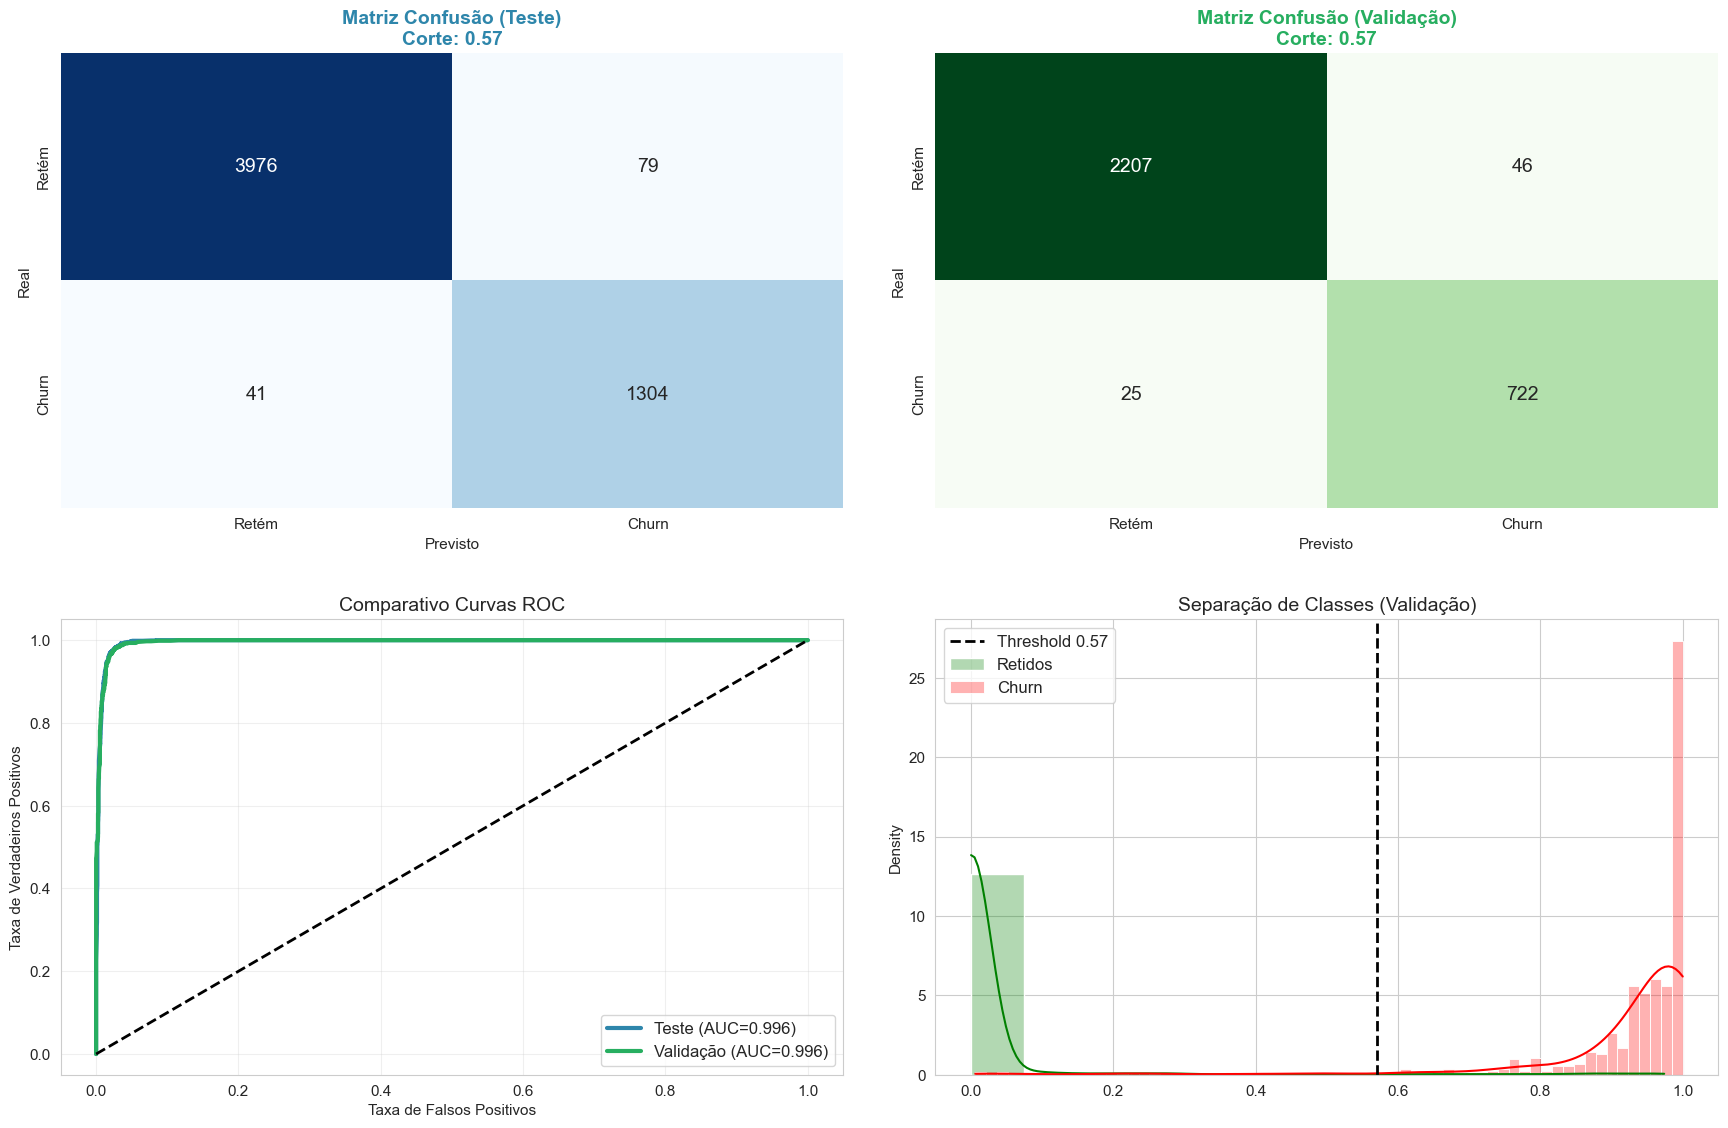


[VEREDICTO FINAL]
🏆 MODELO APROVADO: Alta consistência entre ambiente de teste e produção (validação).


In [38]:
# ==============================================================================
#  1. VALIDAÇÃO FINAL E DASHBOARD 
# ==============================================================================

from sklearn.metrics import (
    f1_score, roc_auc_score, precision_score, recall_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para gerar previsões
def get_predictions(model, X, threshold):
    proba = model.predict_proba(X)[:, 1]
    pred = (proba >= threshold).astype(int)
    return proba, pred

# Gerar dados
probs = {'Teste': None, 'Validação': None}
preds = {'Teste': None, 'Validação': None}

probs['Teste'], preds['Teste'] = get_predictions(calibrated_clf, X_test_sel, best_threshold)
probs['Validação'], preds['Validação'] = get_predictions(calibrated_clf, X_val_sel, best_threshold)

# --- Relatório Numérico ---
print(f"{'METRICA':<15} | {'TESTE':<10} | {'VALIDAÇÃO':<10} | {'DELTA':<10}")
print("-" * 55)

metrics_func = {
    'F1-Score': f1_score,
    'ROC-AUC': roc_auc_score,
    'Precision': lambda y, p: precision_score(y, p, zero_division=0),
    'Recall': recall_score
}

for name, func in metrics_func.items():
    if name == 'ROC-AUC':
        score_test = func(y_test, probs['Teste'])
        score_val = func(y_val, probs['Validação'])
    else:
        score_test = func(y_test, preds['Teste'])
        score_val = func(y_val, preds['Validação'])
    
    delta = score_val - score_test
    status = "✅" if abs(delta) < 0.05 else "⚠️"
    print(f"{name:<15} | {score_test:.4f}     | {score_val:.4f}     | {delta:+.4f} {status}")

# --- Dashboard Gráfico (4 Gráficos: 2x2) ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Matriz de Confusão (Teste) - AZUL (Ambiente de Desenvolvimento)
cm_test = confusion_matrix(y_test, preds['Teste'])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0],
            xticklabels=['Retém', 'Churn'], yticklabels=['Retém', 'Churn'], annot_kws={"size": 14})
axes[0, 0].set_title(f"Matriz Confusão (Teste)\nCorte: {best_threshold:.2f}", fontsize=14, fontweight='bold', color='#2E86AB')
axes[0, 0].set_ylabel('Real')
axes[0, 0].set_xlabel('Previsto')

# 2. Matriz de Confusão (Validação) - VERDE (Prova Real / Produção)
cm_val = confusion_matrix(y_val, preds['Validação'])
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0, 1],
            xticklabels=['Retém', 'Churn'], yticklabels=['Retém', 'Churn'], annot_kws={"size": 14})
axes[0, 1].set_title(f"Matriz Confusão (Validação)\nCorte: {best_threshold:.2f}", fontsize=14, fontweight='bold', color='#27AE60')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Previsto')

# 3. Curvas ROC Comparativas
results_comparison = {'y_true': {'Teste': y_test, 'Validação': y_val}}
colors = {'Teste': '#2E86AB', 'Validação': '#27AE60'} # Azul e Verde para combinar

for name in ['Teste', 'Validação']:
    fpr, tpr, _ = roc_curve(results_comparison['y_true'][name], probs[name])
    auc_s = auc(fpr, tpr)
    axes[1, 0].plot(fpr, tpr, lw=3, label=f'{name} (AUC={auc_s:.3f})', color=colors[name])

axes[1, 0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1, 0].set_title('Comparativo Curvas ROC', fontsize=14)
axes[1, 0].set_xlabel('Taxa de Falsos Positivos')
axes[1, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[1, 0].legend(fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma de Probabilidades (Validação)
sns.histplot(probs['Validação'][y_val==0], color='green', label='Retidos', kde=True, stat="density", alpha=0.3, ax=axes[1, 1])
sns.histplot(probs['Validação'][y_val==1], color='red', label='Churn', kde=True, stat="density", alpha=0.3, ax=axes[1, 1])
axes[1, 1].axvline(best_threshold, color='black', linestyle='--', linewidth=2, label=f'Threshold {best_threshold:.2f}')
axes[1, 1].set_title('Separação de Classes (Validação)', fontsize=14)
axes[1, 1].legend(fontsize=12)

fig.savefig('validacao', dpi=300)
plt.tight_layout(pad=3.0)
plt.show()

# --- Veredicto Final ---
gap_f1 = abs(f1_score(y_test, preds['Teste']) - f1_score(y_val, preds['Validação']))
print("\n[VEREDICTO FINAL]")
if gap_f1 < 0.05:
    print("🏆 MODELO APROVADO: Alta consistência entre ambiente de teste e produção (validação).")
else:
    print("⚠️ ALERTA DE OVERFITTING: Performance caiu significativamente na validação.")

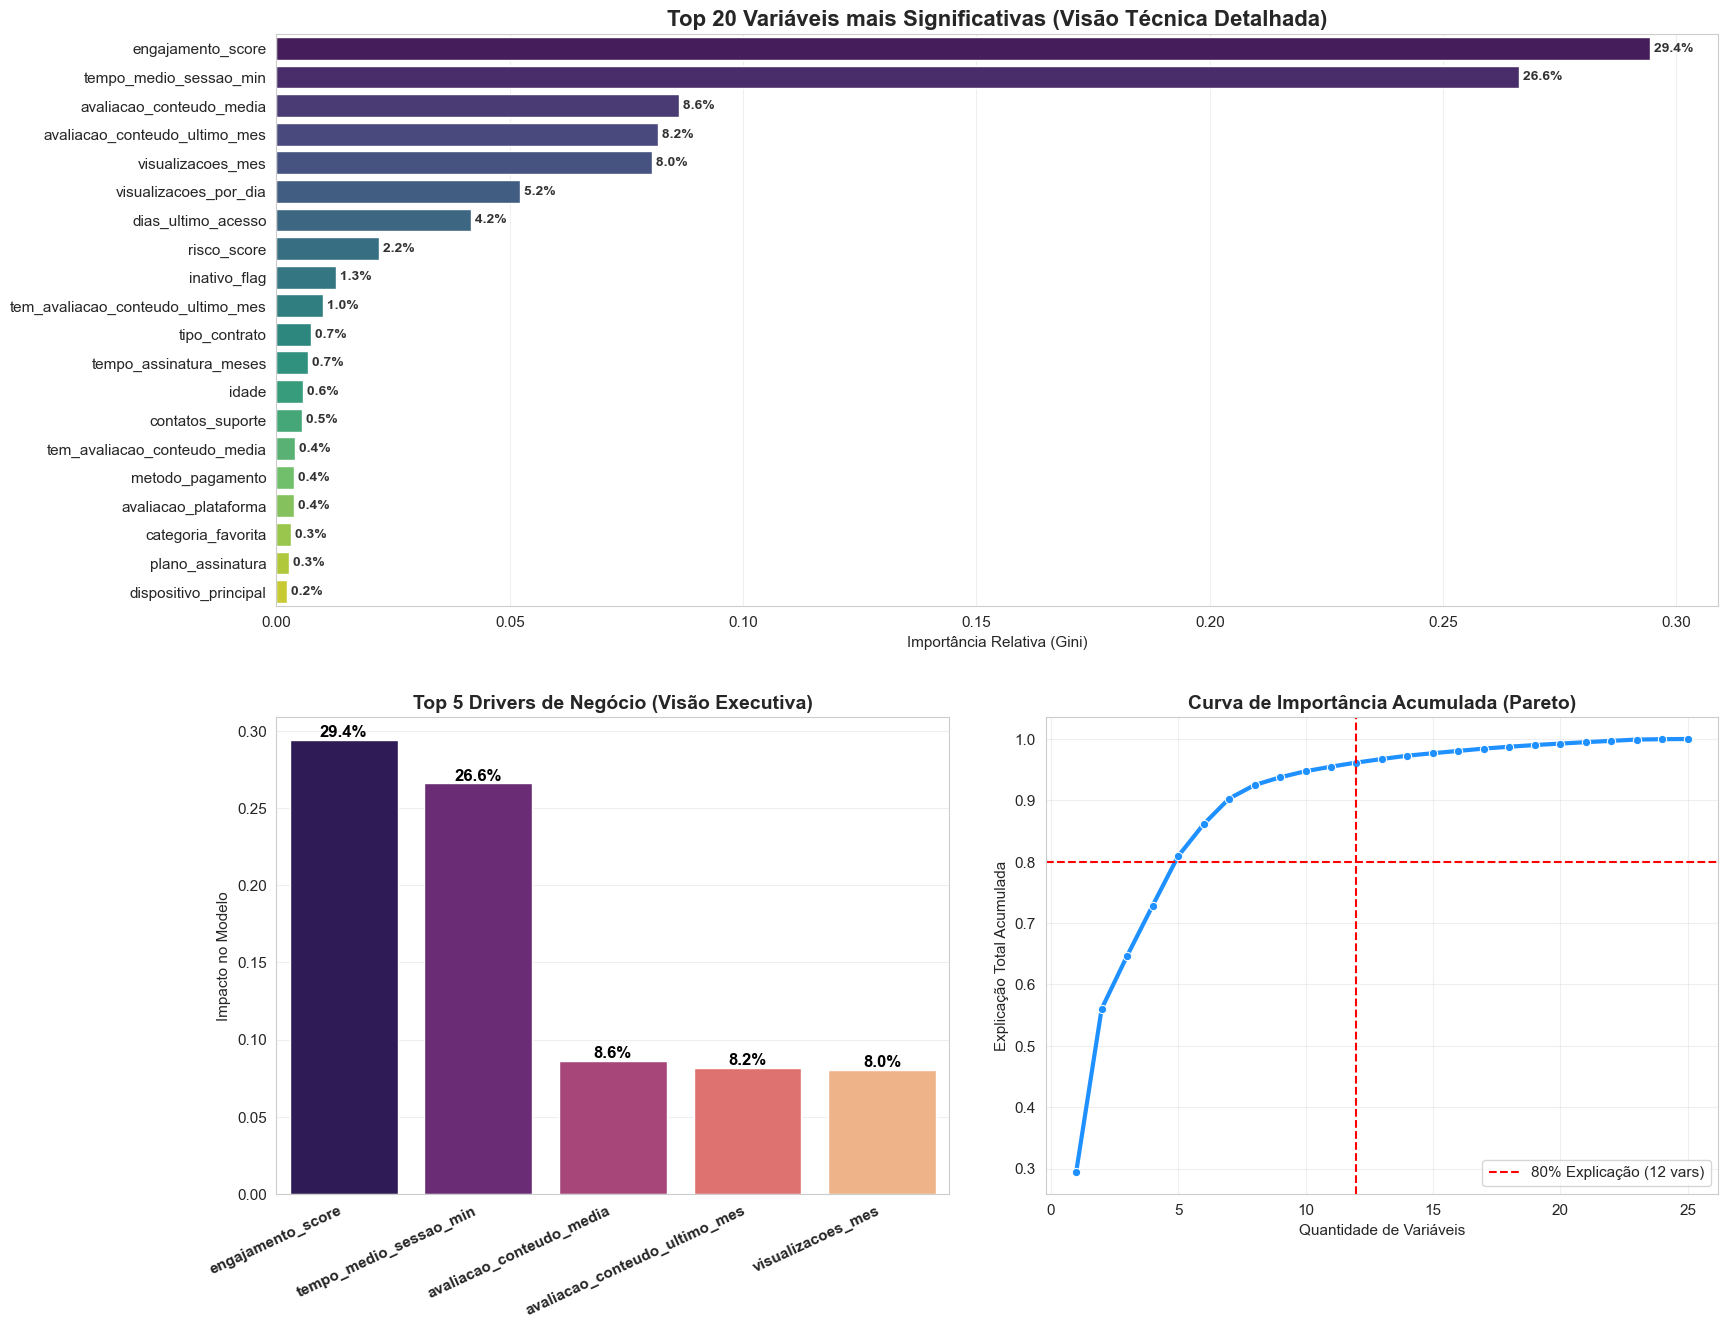


RESUMO ESTATÍSTICO DE DRIVERS DO MODELO
1. CONCENTRAÇÃO: As Top 5 variáveis representam 80.9% de todo o poder preditivo.
2. EFICIÊNCIA: Apenas 12 variáveis (de 25) são necessárias para explicar 80% do modelo.
--------------------------------------------------------------------------------
TOP 5 DRIVERS (Prioridade para Ação de Negócio):
  23. ENGAJAMENTO_SCORE              | Impacto Individual: 29.43%
  13. TEMPO_MEDIO_SESSAO_MIN         | Impacto Individual: 26.62%
  16. AVALIACAO_CONTEUDO_MEDIA       | Impacto Individual: 8.62%
  17. AVALIACAO_CONTEUDO_ULTIMO_MES  | Impacto Individual: 8.18%
  12. VISUALIZACOES_MES              | Impacto Individual: 8.05%


In [39]:
# ==============================================================================
# 2. DASHBOARD ANALÍTICO DE VARIÁVEIS (FEATURE IMPORTANCE) - FINAL
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# 1. Extração e Preparação dos Dados
# ------------------------------------------------------------------------------
importances = best_rf.feature_importances_
feature_names = np.array(selected_cols)

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

df_importance['Cumulative'] = df_importance['Importance'].cumsum()

top_20 = df_importance.head(20)
top_5 = df_importance.head(5)

# 2. Configuração do Layout Gráfico
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1.2, 1]) 

# --- GRÁFICO 1: TOP 20 VARIÁVEIS (Superior) ---
ax1 = fig.add_subplot(gs[0, :]) 
sns.barplot(x='Importance', y='Feature', data=top_20, ax=ax1, palette='viridis')

ax1.set_title('Top 20 Variáveis mais Significativas (Visão Técnica Detalhada)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Importância Relativa (Gini)')
ax1.set_ylabel('')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_20['Importance']):
    ax1.text(v, i, f' {v:.1%}', va='center', fontsize=10, fontweight='bold', color='#333333')


# --- GRÁFICO 2: TOP 5 DRIVERS (Inferior Esquerdo) ---
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(x='Feature', y='Importance', data=top_5, ax=ax2, palette='magma')

ax2.set_title('Top 5 Drivers de Negócio (Visão Executiva)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Impacto no Modelo')
ax2.set_xlabel('')
ax2.grid(axis='y', alpha=0.3)

# --- AJUSTE SOLICITADO: Rotação e Negrito no Eixo X ---
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha='right', fontweight='bold', fontsize=11)

# Rótulos nas barras
for index, row in top_5.reset_index().iterrows():
    ax2.text(index, row['Importance'], f"{row['Importance']:.1%}", 
             color='black', ha="center", va="bottom", fontweight='bold', fontsize=12)


# --- GRÁFICO 3: CURVA DE PARETO (Inferior Direito) ---
ax3 = fig.add_subplot(gs[1, 1])
sns.lineplot(x=range(1, len(df_importance)+1), y=df_importance['Cumulative'], 
             ax=ax3, color='dodgerblue', linewidth=3, marker='o', markersize=6)

# Linhas de referência
pareto_threshold = 0.80
try:
    idx_80 = df_importance[df_importance['Cumulative'] >= pareto_threshold].index[0] + 1
except IndexError:
    idx_80 = len(df_importance)

ax3.axvline(idx_80, color='red', linestyle='--', label=f'80% Explicação ({idx_80} vars)')
ax3.axhline(pareto_threshold, color='red', linestyle='--')
ax3.set_title('Curva de Importância Acumulada (Pareto)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Quantidade de Variáveis')
ax3.set_ylabel('Explicação Total Acumulada')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

fig.savefig('feature_importance', dpi = 300)
plt.tight_layout(pad=3.0)
plt.show()

# 3. Resumo Estatístico Final
# ------------------------------------------------------------------------------
print("\n" + "="*80)
print("RESUMO ESTATÍSTICO DE DRIVERS DO MODELO")
print("="*80)
print(f"1. CONCENTRAÇÃO: As Top 5 variáveis representam {top_5['Importance'].sum():.1%} de todo o poder preditivo.")
print(f"2. EFICIÊNCIA: Apenas {idx_80} variáveis (de {len(df_importance)}) são necessárias para explicar 80% do modelo.")
print("-" * 80)
print("TOP 5 DRIVERS (Prioridade para Ação de Negócio):")
for i, row in top_5.iterrows():
    print(f"  {i+1}. {row['Feature'].upper():<30} | Impacto Individual: {row['Importance']:.2%}")
print("="*80)

# 

## `BLOCO 9: Salvamento dos Artefatos`

In [36]:
# ==============================================================================
# 8. PERSISTÊNCIA DE MODELO E METADADOS
# ==============================================================================

artifacts = {
    'model': calibrated_clf,
    'features': selected_cols,
    'threshold': best_threshold,
    'stats_train': stats_train,
    'label_encoders': label_encoders # Opcional, se precisar decodificar depois
}

joblib.dump(artifacts, 'churn_prediction_pipeline.joblib')
print("[INFO] Pipeline completo salvo em 'churn_prediction_pipeline.joblib'")
print("[INFO] O arquivo contém: Modelo, Lista de Features, Threshold e Stats de Engenharia.")

[INFO] Pipeline completo salvo em 'churn_prediction_pipeline.joblib'
[INFO] O arquivo contém: Modelo, Lista de Features, Threshold e Stats de Engenharia.


#

-----------------

# `Relatório Data Science: Churn Streaming`

### 1. Introdução e Metodologia

Este relatório apresenta o desenvolvimento de um **modelo preditivo** de alta precisão para identificar o 
**Churn de clientes no setor de streaming**. A metodologia seguiu etapas rigorosas de pré-processamento, 
modelagem e validação final.

### 2. Preparação e Estratificação dos Dados

- `Processamento Inicial:` O dataset original de 30.000 registros passou por limpeza e criação de flags MNAR para variáveis de avaliação, preservando o valor informacional dos dados ausentes.

- `Divisão do Dataset:` Os dados foram segmentados em Treino (21.600), Teste (5.400) e Validação (3.000), garantindo uma prova real (holdout) isenta de vazamentos.

### 3. Otimização e Calibração do Modelo

- `Seleção de Atributos:` O método RFE selecionou as 25 variáveis mais impactantes.

- `Hiperparâmetros:` Via GridSearchCV, o modelo Random Forest foi otimizado (F1-Score: 0.9482), priorizando o peso da classe Churn para mitigar falsos negativos.

- `Confiabilidade:` A calibração isotônica ajustou as probabilidades, definindo o threshold ótimo em 0.5698.

### 4. Performance e Robustez

O modelo atingiu níveis de excelência com alta consistência entre os ambientes:
- `F1-Score (Validação):` 0.9531.
- `ROC-AUC:` 0.9957.
- `Estabilidade:` Deltas mínimos (< 0.003) entre teste e validação confirmam a robustez do aprendizado.

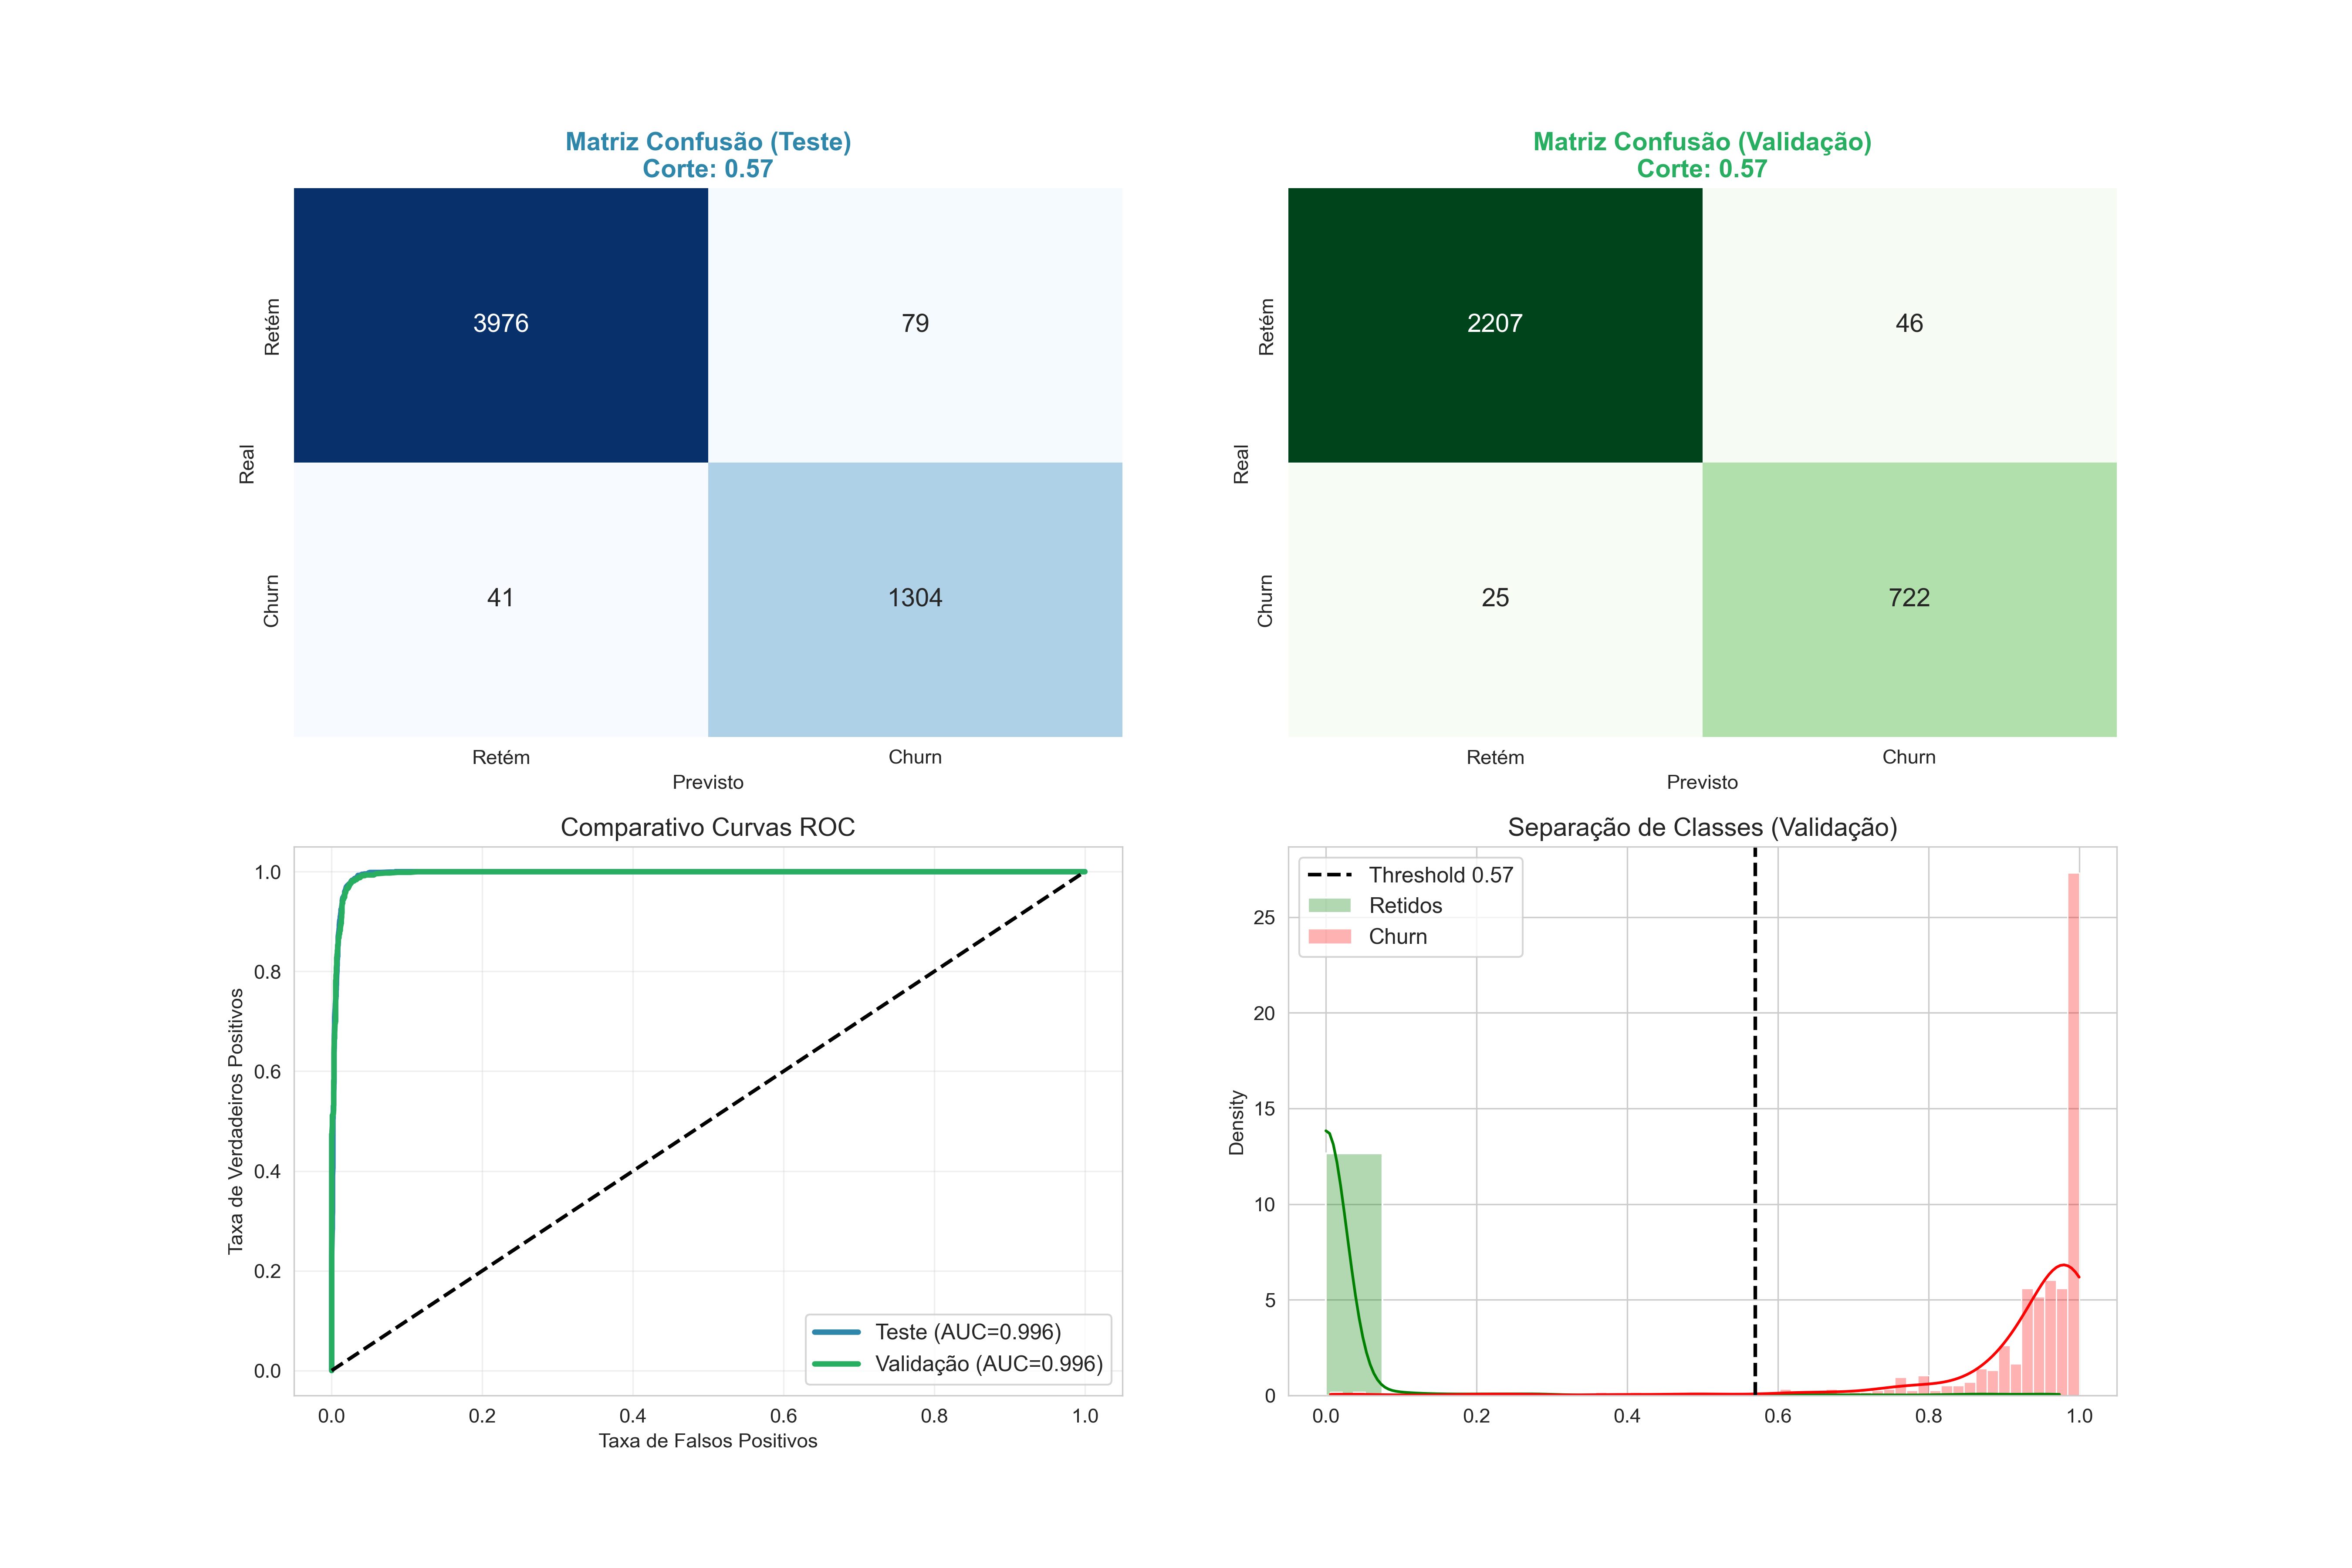

### 5. Inteligência de Negócio (Drivers de Decisão)

A análise identificou que apenas 12 variáveis explicam 80% do modelo. `Os 5 principais drivers representam 80.9%` do poder preditivo:
- `Engajamento Score:` 29.43%
- `Tempo Médio de Sessão:` 26.62%
- `Avaliação de Conteúdo (Média):` 8.62%
- `Avaliação de Conteúdo Ultimo Mês:` 8.2%
- `Vizualizações no Mês:` 8.0%

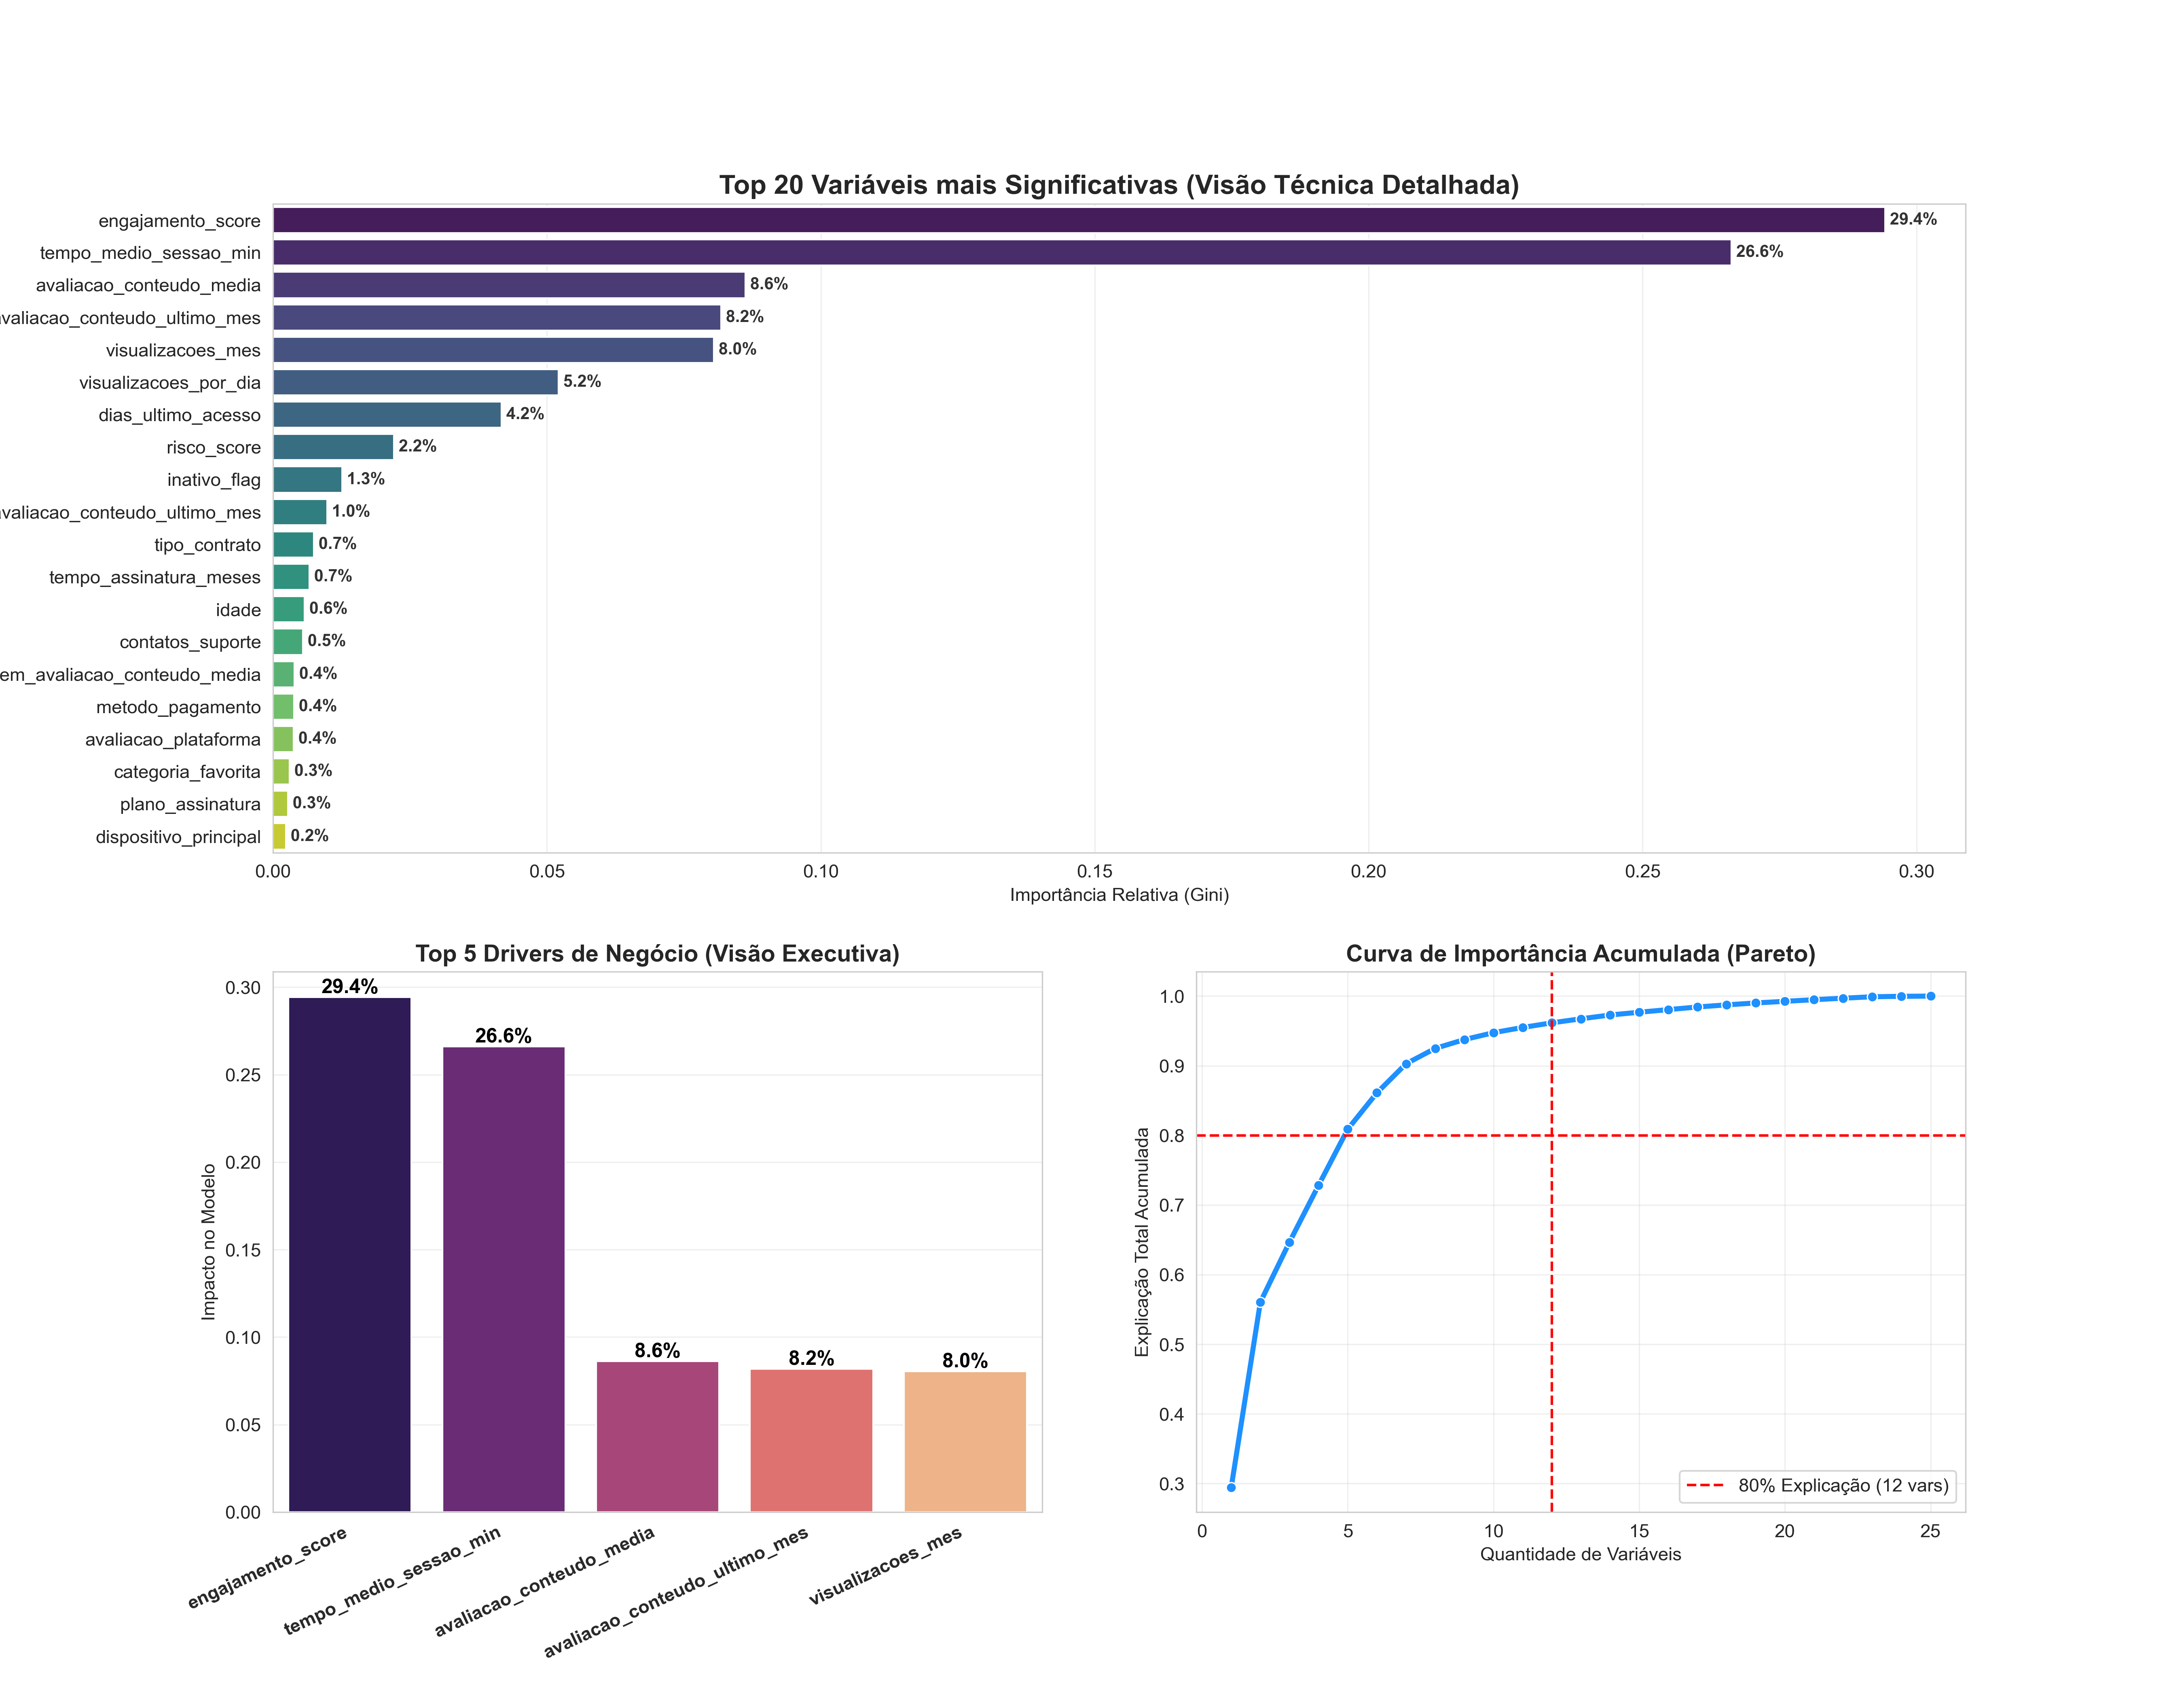

### 6. Conclusão e Próximos Passos

O modelo está aprovado para deploy. Recomenda-se o uso do Score de Engajamento como principal gatilho para campanhas preventivas de retenção.